# Short Time Series Biclustering

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import glob
import multiprocessing
from operator import attrgetter
from sklearn.datasets import make_biclusters
from sklearn.datasets import samples_generator as sg
from sklearn.preprocessing import MinMaxScaler

In [112]:
data = pd.read_csv('TestData/SimulatedDataCoherence/BiclusterABC_high.csv',header=None)
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)*2-1

data = np.concatenate((data,data),axis=0)

In [175]:
class BisectingClusterer(object):
    def __init__(self, data):
        if data is not None:
            self._data = np.array(data)
            self._I, self._J = self._data.shape
        else:
            print("Empty data")
    
    @property
    def centroids(self):
        return self._centroids

    def fit(self):
        self._centroids = self._compute_centroids_()
        bisecting_indices = self._bisect_clusters_(self._centroids)
        return bisecting_indices
    
    def fit_rows(self):
        return self.fit()
    
    def fit_cols(self):
        t_data = self._data.T
        aux_I, aux_J = t_data.shape
        assert aux_I >= 3, "bicluster not large enough"
        aux_indices = np.zeros(aux_I)
        print(len(t_data))
        max_coherence = 0
        middle = 0
        for i in range (1, aux_I-1):
            print("Bicluster A")
            print(t_data[i:len(t_data)])
            h_A = PairBasedCoherence(t_data[i:len(t_data)]).HP
            print(h_A)
            print("Bicluster B")
            print(t_data[0:i+1])
            h_B=PairBasedCoherence(t_data[0:i+1]).HP
            print(h_B)
            temp_coherence = h_A + h_B
            print("sum " + str(temp_coherence))
            if(temp_coherence>=max_coherence):
                max_coherence = temp_coherence
                left_coherence = h_B
                right_coherence = h_A
                middle = i
           
        print("middle " + str(middle))
        print("left coherence " + str(left_coherence))
        sns.tsplot(data = (t_data[0:middle+1]).T,err_style="unit_traces")
        plt.show()
        plt.gcf().clear()
        print("right coherence " + str(right_coherence))
        sns.tsplot(data = (t_data[middle:len(t_data)]).T,err_style="unit_traces")
        print(max_coherence)
        
        
    def _compute_centroids_(self):
        max_correlation = 0
        centroids = [0,0]
        for i in range(self._I):
            for j in range(i+1, self._I):
                if (i == j):
                    break
                correlation = PositiveNegativeCorrelation(self._data[i],
                                                          self._data[j],
                                                          self._J).H_neg
                if(correlation > max_correlation):
                    max_correlation = correlation
                    centroids[0] = i
                    centroids[1] = j
        return centroids

    def _bisect_clusters_(self, centroids):
        cluster_indices = np.zeros(self._I)
        for i in range(self._I):
            correlation0 = PositiveNegativeCorrelation(
                self._data[centroids[0]], self._data[i],self._J).H_pos
            correlation1 = PositiveNegativeCorrelation(
                self._data[centroids[1]], self._data[i],self._J).H_pos
            if(correlation0 <= correlation1):
                cluster_indices[i] = 1
        return cluster_indices

In [176]:
%%latex
Define H for a new term 'z' in X
$$
H_{1}(I,J,X,z) =H_{0}(I,J,X) \cdot \frac{(I-1)}{(I+1)} + \frac{|2|}{(I)(I+1)} \cdot \sum_{x \epsilon X} {h(x,z,J)}
$$

<IPython.core.display.Latex object>

In [177]:
class ClusterMaps(object):
    def __init__(self, rho=None, gamma=None, H = 0):
        self.gamma = gamma
        self.rho = rho
        self.H = H
    
    def __str__(self):
        return ("rho: \n"+ str(self.rho) + "\ngamma: \n" + str(self.gamma) + "\nH: \n " + str(self.H))

In [178]:
test_arr = np.random.rand(5,5)
test_arr

array([[ 0.39961605,  0.9516636 ,  0.82476907,  0.8303439 ,  0.73570807],
       [ 0.95960997,  0.07673354,  0.45401498,  0.42561692,  0.51780996],
       [ 0.1439658 ,  0.08837105,  0.85638378,  0.82517143,  0.855261  ],
       [ 0.73642228,  0.79353197,  0.36326525,  0.25186197,  0.50189085],
       [ 0.99159532,  0.68218871,  0.86448323,  0.09798198,  0.62870453]])

In [179]:
test_arr.T[3:4]

array([[ 0.8303439 ,  0.42561692,  0.82517143,  0.25186197,  0.09798198]])

In [180]:
test_data = np.array(data)[np.ix_([0,8,27,39,42,43,49,54,72,74,79,86,88,108,113,122,142,158
,300,308,327,339,342,343,349,354,372,374,379,386,388,408,413,422,442,458],[0,1,2,3,4,5,6])]

In [192]:
cl_test = BisectingClusterer(aux_data)

11
Bicluster A
[[ 0.1995    -0.81686    0.91126    0.89402    0.46163   -0.08011    0.42141
   0.53015   -0.85382    0.88481   -0.69722    0.54625   -0.28963    0.68925
  -0.050249  -0.92655   -0.63542   -0.17184    0.40546   -0.10148   -0.17156
  -0.50587    0.13822    0.44981   -0.099292  -0.32389    0.80118    0.44174
   0.33534   -0.94095   -0.66222    0.49595    0.30335    0.97927    0.21629
   0.18584   -0.30748   -0.31537    0.71254    0.81949   -0.3676    -0.98096
  -0.25643   -0.94232    0.15596    0.947      0.18185   -0.43139   -0.80759
  -0.41435   -0.070261  -0.85427   -0.82945    0.2613     0.33683    0.80476
  -0.39398   -0.706      0.38151   -0.29827    0.61389    0.57832    0.60054
   0.75108   -0.58168    0.28016   -0.02799   -0.39831   -0.99718    0.46687
   0.7225    -0.40254    0.94453    0.56549   -0.12111    0.97654    0.49995
   0.79291    0.16555    0.70972    0.64533    0.7701    -0.61788    0.4254
   0.24378   -0.89142    0.92901    0.43473   -0.48748   -0.46

Bicluster B
[[-0.39268   -0.64453   -0.32601   -0.44732    0.84951   -0.31545    0.18329
  -0.52972   -0.68178   -0.71917   -0.78407    0.98398    0.80136   -0.33991
   0.3076    -0.055434   0.15475   -0.98173   -0.65947   -0.097881   0.45801
  -0.89273   -0.80772   -0.0076987  0.50152   -0.39341    0.53377   -0.27083
   0.25694   -0.66957   -0.25368   -0.58079   -0.98965    0.27988    0.84083
  -0.87145   -0.58686    0.63734   -0.79369    0.053298  -0.55275    0.66601
  -0.98058   -0.81978   -0.79118   -0.6843     0.68954    0.40304   -0.82997
  -0.17393   -0.84097   -0.72005   -0.17648   -0.21588   -0.26727    0.44579
   0.24376    0.04225   -0.93752   -0.4215     0.47273    0.51099   -0.32536
   0.097338   0.52402   -0.90948    0.72136    0.66505    0.60093    0.95047
   0.77369    0.05875    0.34074    0.89117    0.039187  -0.79806   -0.96185
  -0.63656    0.26023    0.6966     0.18637    0.62958   -0.27434    0.6889
  -0.13302    0.50039    0.38627    0.54423    0.02572    0.02403

[[-0.39268   -0.64453   -0.32601   -0.44732    0.84951   -0.31545    0.18329
  -0.52972   -0.68178   -0.71917   -0.78407    0.98398    0.80136   -0.33991
   0.3076    -0.055434   0.15475   -0.98173   -0.65947   -0.097881   0.45801
  -0.89273   -0.80772   -0.0076987  0.50152   -0.39341    0.53377   -0.27083
   0.25694   -0.66957   -0.25368   -0.58079   -0.98965    0.27988    0.84083
  -0.87145   -0.58686    0.63734   -0.79369    0.053298  -0.55275    0.66601
  -0.98058   -0.81978   -0.79118   -0.6843     0.68954    0.40304   -0.82997
  -0.17393   -0.84097   -0.72005   -0.17648   -0.21588   -0.26727    0.44579
   0.24376    0.04225   -0.93752   -0.4215     0.47273    0.51099   -0.32536
   0.097338   0.52402   -0.90948    0.72136    0.66505    0.60093    0.95047
   0.77369    0.05875    0.34074    0.89117    0.039187  -0.79806   -0.96185
  -0.63656    0.26023    0.6966     0.18637    0.62958   -0.27434    0.6889
  -0.13302    0.50039    0.38627    0.54423    0.02572    0.024035   0.9967
 

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


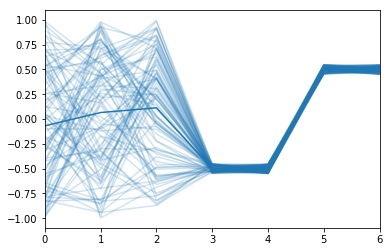

right coherence 0.967356186219
1.90171368801


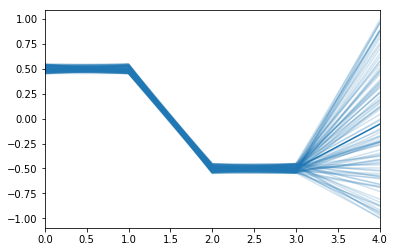

In [193]:
cl_test.fit_cols()

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


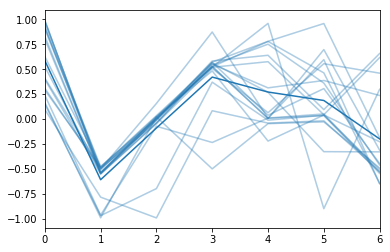

In [128]:
sns.tsplot(data= test_data,err_style="unit_traces")

In [ ]:
class TsRapooc(object):
    def __init__(self, data, n_clusters = 5):
        self._D = np.array(data)
        self._n_clusters = n_clustxvers
        self._labels = list()
        self._I, self._J = data.shape
        
    @property
    def n_clusters(self):
        return self._n_clusters
    
    @property
    def data(self):
        return self._D
    
    @property
    def labels(self):
        return _labels

In [189]:
aux_data = pd.read_csv('TestData/SimulatedDataCoherence/BiclusterC_high.csv',header=None)

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


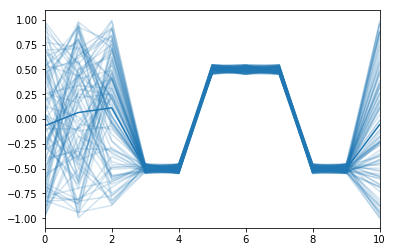

In [191]:
sns.tsplot(data= np.array(aux_data),err_style="unit_traces")